In [193]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from matplotlib import style
from statsmodels.tsa.stattools import adfuller, kpss
from scipy import signal
from pandas.plotting import autocorrelation_plot
style.use('dark_background')
import datetime
import statsmodels.api as sm
from matplotlib import rcParams
%matplotlib inline

In [194]:
df = pd.read_csv('acceleration.csv',header=1, parse_dates=['Time'], index_col='Time')
df.columns = ['acceleration']
df['acceleration'] = df['acceleration'].str.replace(' m/s²', '').astype(float)
df

,acceleration
Time,
2021-12-09 09:42:35,15.0
2021-12-09 09:43:35,15.5
2021-12-09 09:44:35,15.1
2021-12-09 09:45:35,14.7
2021-12-09 09:46:36,13.0
...,...
2022-06-09 09:37:31,14.0
2022-06-09 09:38:31,13.8
2022-06-09 09:39:31,14.6


In [195]:
df.fillna(method='backfill',inplace=True)


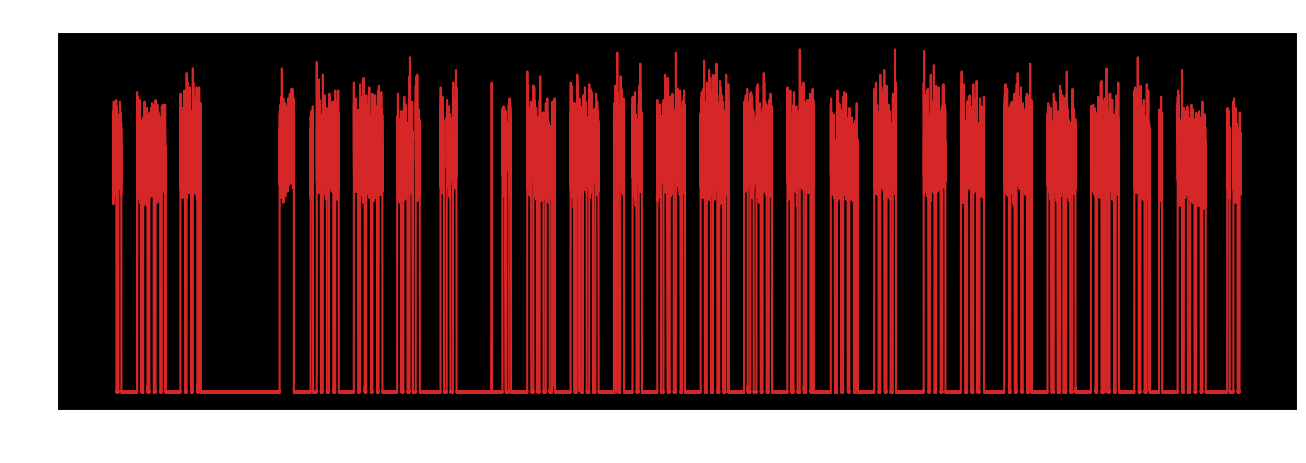

In [196]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df.index, df['acceleration'], color='tab:red')
# plt.axhline(y=[18], color='green', ls='--', lw=2, label='vline_multiple - full height')
plt.gca().set(title='acceleration', xlabel='date', ylabel='m/s2')
plt.show()

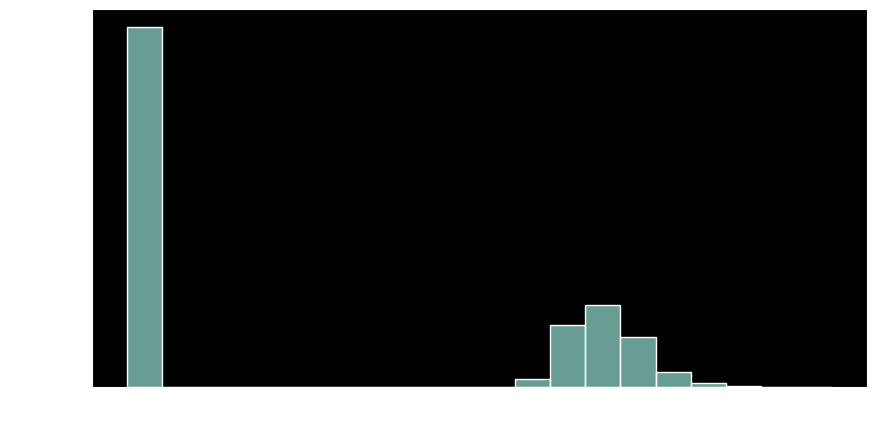

In [197]:
#Histogram with 3 standard deviations
plt.figure(figsize=(10,5), dpi=100)
# plt.hist(df['acceleration'], bins = 20
sns.histplot(df['acceleration'], bins = 20)
# plt.axvline(x=df['acceleration'].mean()+3*df['acceleration'].std(), color='red',ls= '--')
# plt.axvline(x=df['acceleration'].mean()-3*df['acceleration'].std(), color='red',ls= '--')
plt.show()

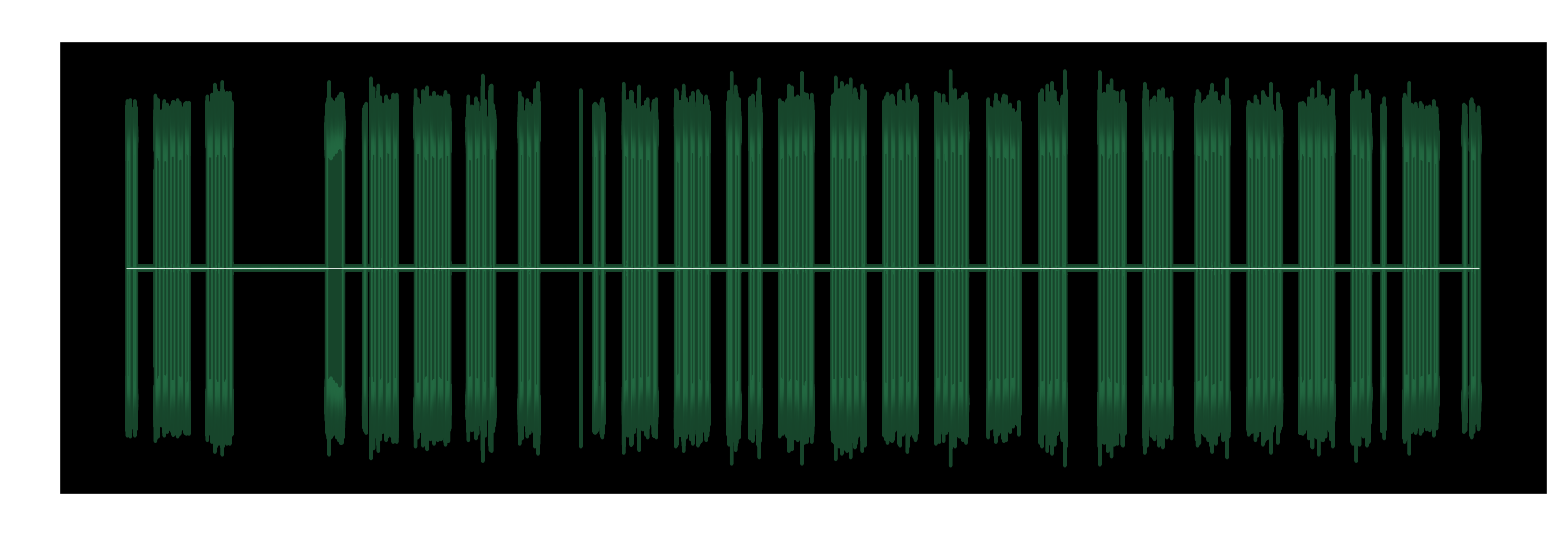

In [198]:
# Mirror axis
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(df.index, y1=df['acceleration'], y2=-df['acceleration'], alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-25, 25)
plt.title('Acceleration two side view', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

In [199]:
df_hour = df.resample('H').median()
df_hour['weekday'] = [d.strftime('%a') for d in df_hour.index]
df_hour['hour'] = [d.strftime('%H') for d in df_hour.index]
df_hour['yearweek'] = [d.strftime('%W') for d in df_hour.index]
df_hour['month'] = [d.strftime('%b') for d in df_hour.index]
df_hour['yearday'] = [d.strftime('%j') for d in df_hour.index]
df_hour['year'] = [d.strftime('%Y') for d in df_hour.index]
df_hour['hour']=df_hour['hour'].astype(int)

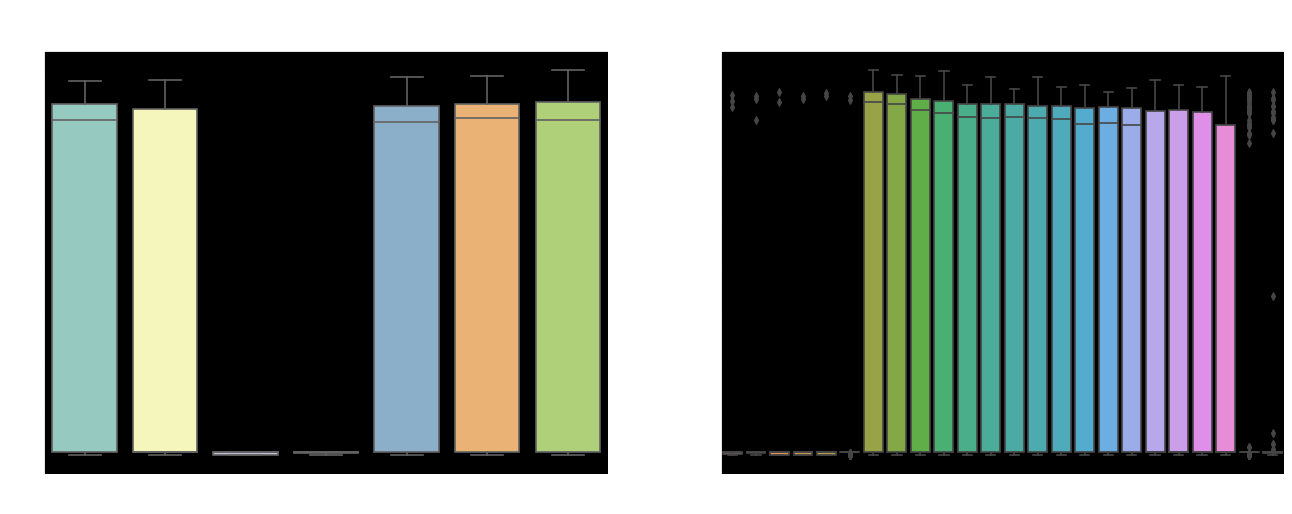

In [200]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='weekday', y='acceleration', data=df_hour, ax=axes[0])
sns.boxplot(x='hour', y='acceleration', data=df_hour.loc[~df_hour.yearweek.isin([1, 52]), :])

# Set Title
axes[0].set_title('Week-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Hour-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

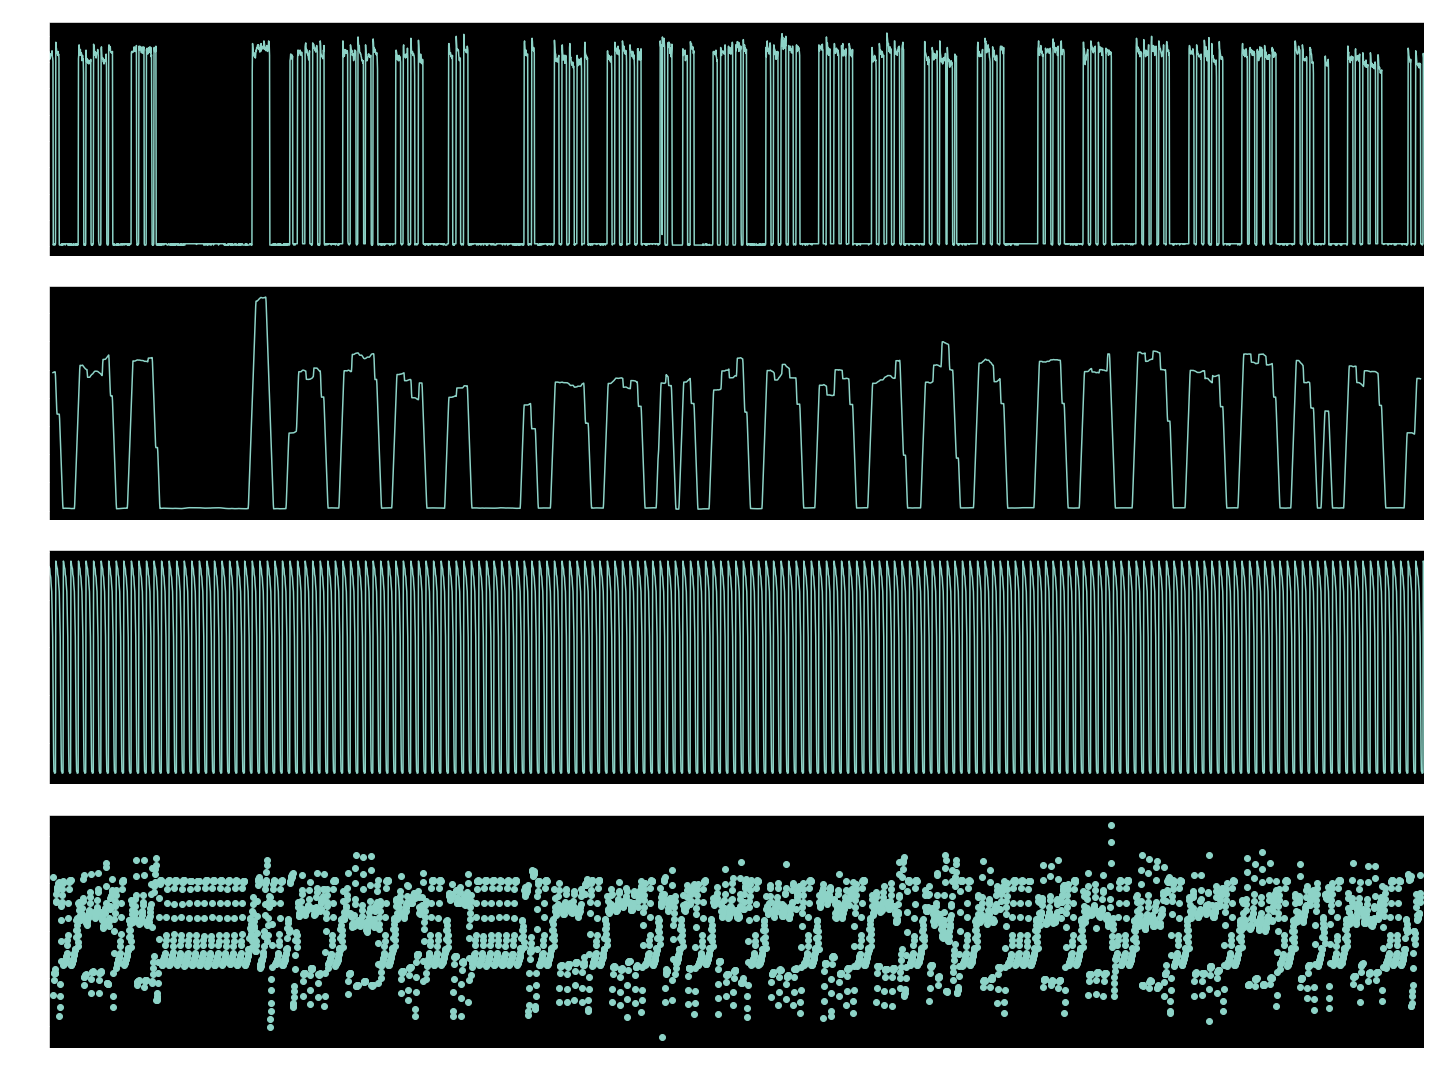

In [201]:

df_hour['acceleartion']=df_hour['acceleration'].fillna(method='backfill',inplace=True)

decomposition = sm.tsa.seasonal_decompose(df_hour['acceleration'])

rcParams["figure.figsize"] = 20, 15
decomposition.plot();

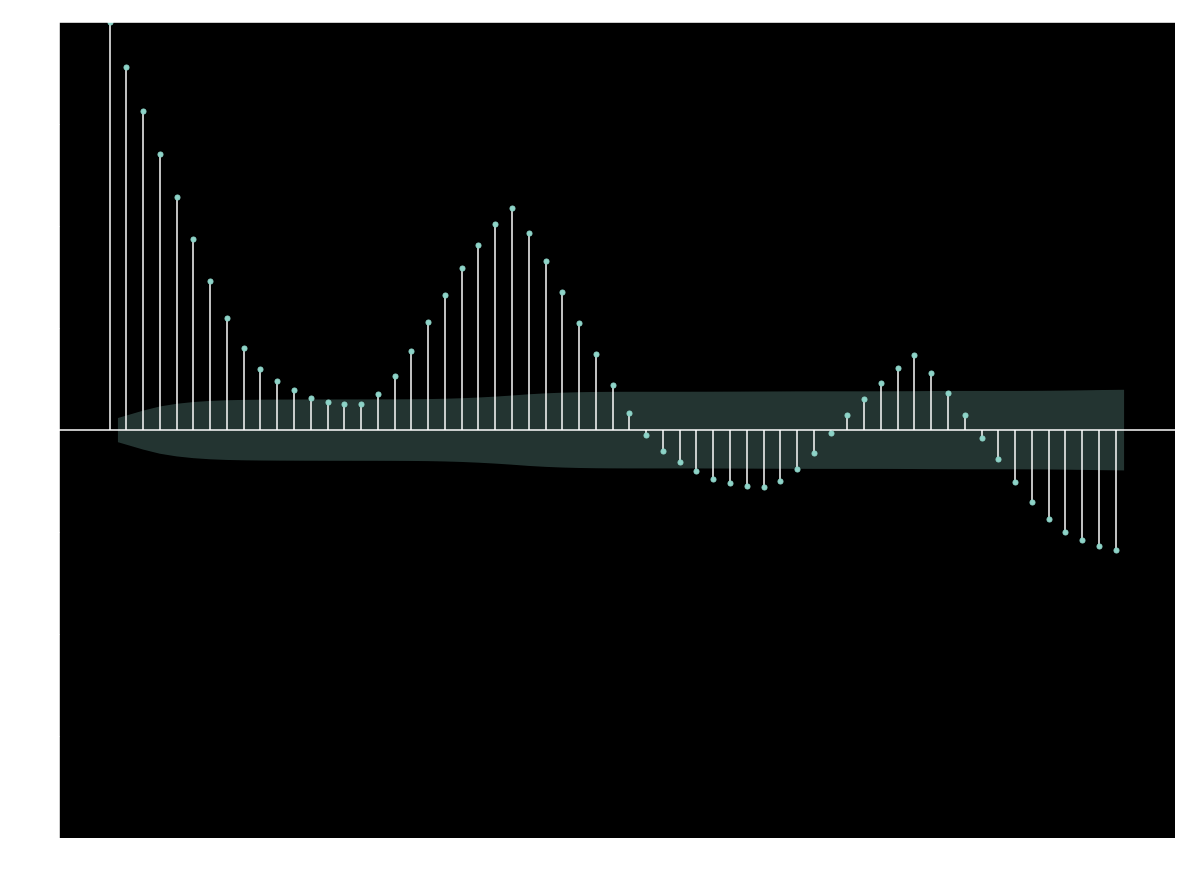

In [202]:
from statsmodels.graphics import tsaplots


# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(df_hour['acceleration'], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


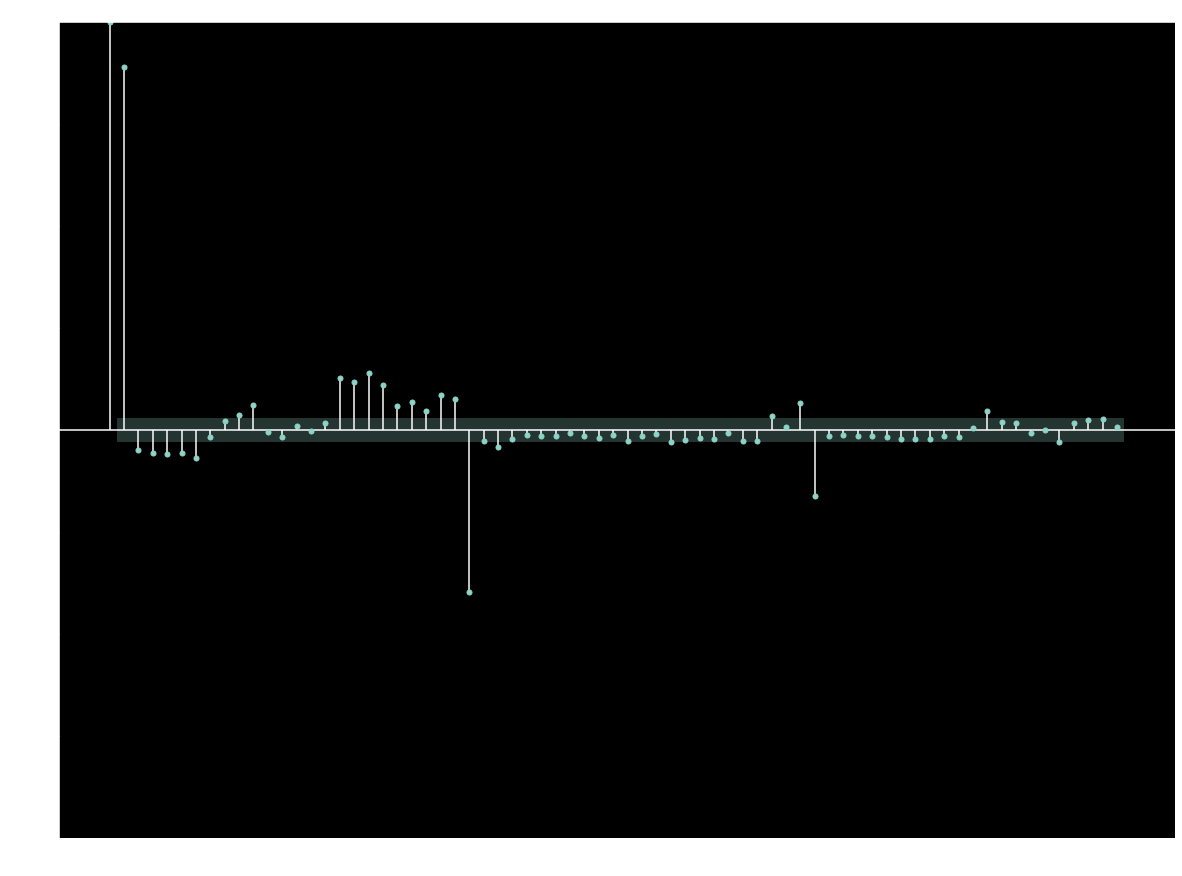

In [203]:
fig = tsaplots.plot_pacf(df_hour['acceleration'], lags=70)

plt.title("Partial Autocorrelation of Benzene")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();

In [204]:
#Explore the whole series without lower values
df_hour=df_hour[df_hour['acceleration']>12]
df_hour

,acceleration,weekday,hour,yearweek,month,yearday,year,acceleartion
Time,,,,,,,,
2021-12-09 09:00:00,14.75,Thu,9,49,Dec,343,2021,None
2021-12-09 10:00:00,14.20,Thu,10,49,Dec,343,2021,None
2021-12-09 11:00:00,14.45,Thu,11,49,Dec,343,2021,None
2021-12-09 12:00:00,14.25,Thu,12,49,Dec,343,2021,None
2021-12-09 13:00:00,14.45,Thu,13,49,Dec,343,2021,None
...,...,...,...,...,...,...,...,...
2022-06-08 21:00:00,13.85,Wed,21,23,Jun,159,2022,None
2022-06-09 06:00:00,14.65,Thu,6,23,Jun,160,2022,None
2022-06-09 07:00:00,14.40,Thu,7,23,Jun,160,2022,None


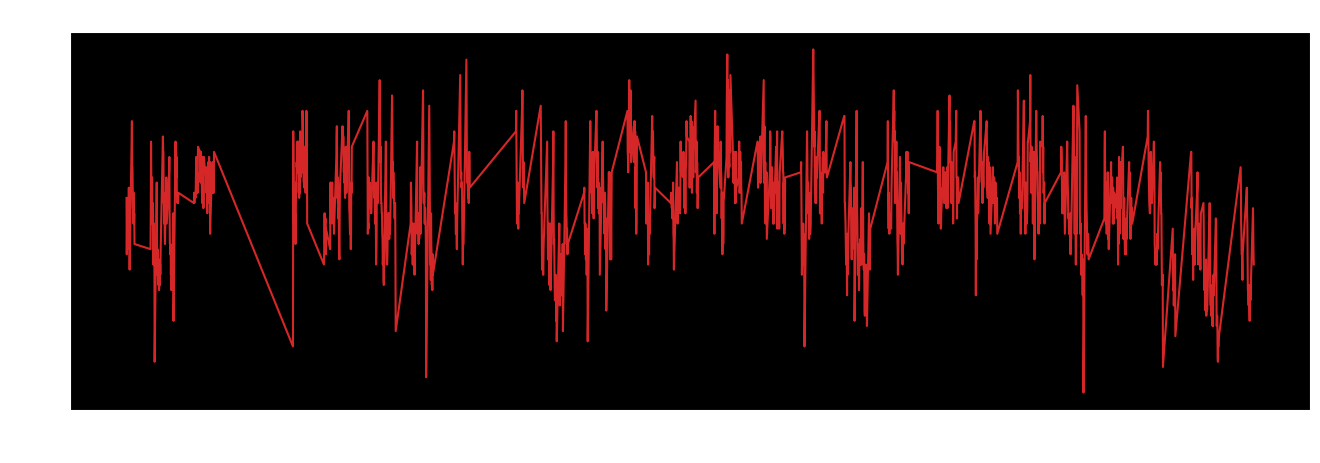

In [205]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df_hour.index, df_hour['acceleration'], color='tab:red')
# plt.axhline(y=[18], color='green', ls='--', lw=2, label='vline_multiple - full height')
plt.gca().set(title='acceleration', xlabel='date', ylabel='m/s2')
plt.show()

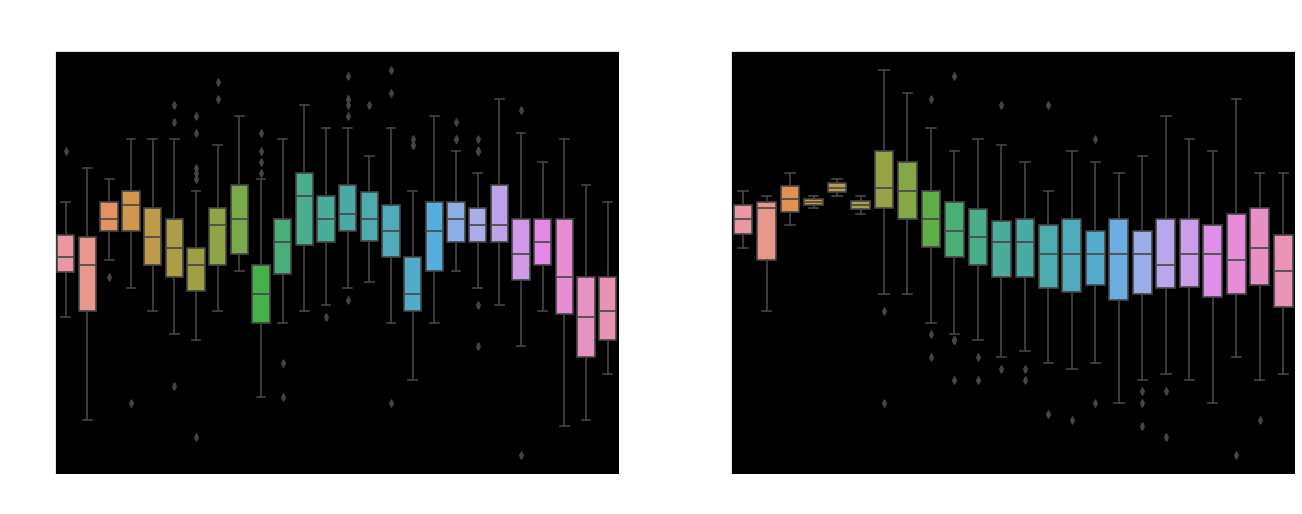

In [206]:
#Box plot of daily based on week of the year

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='yearweek', y='acceleration', data=df_hour, ax=axes[0])
sns.boxplot(x='hour', y='acceleration', data=df_hour.loc[~df_hour.yearweek.isin([1, 52]), :])

# Set Title
axes[0].set_title('Week-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Hour-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

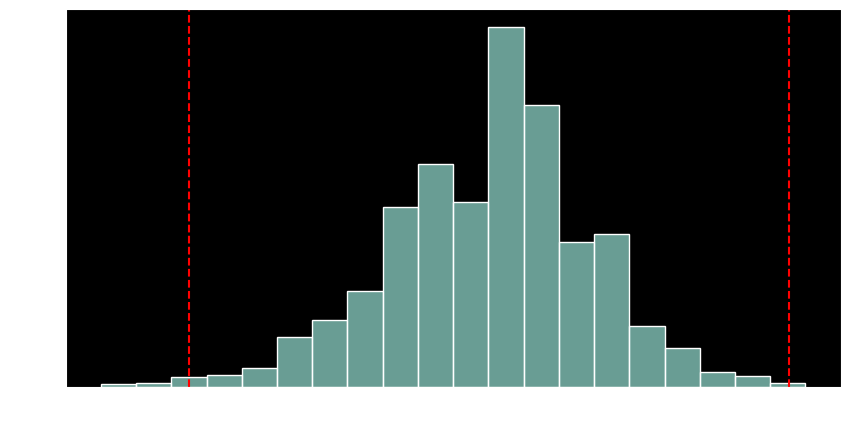

In [207]:
#Histogram with 3 standard deviations
plt.figure(figsize=(10,5), dpi=100)
# plt.hist(df_hour['acceleration'], bins = 20
sns.histplot(df_hour['acceleration'], bins = 20)
plt.axvline(x=df_hour['acceleration'].mean()+3*df_hour['acceleration'].std(), color='red',ls= '--')
plt.axvline(x=df_hour['acceleration'].mean()-3*df_hour['acceleration'].std(), color='red',ls= '--')
plt.show()

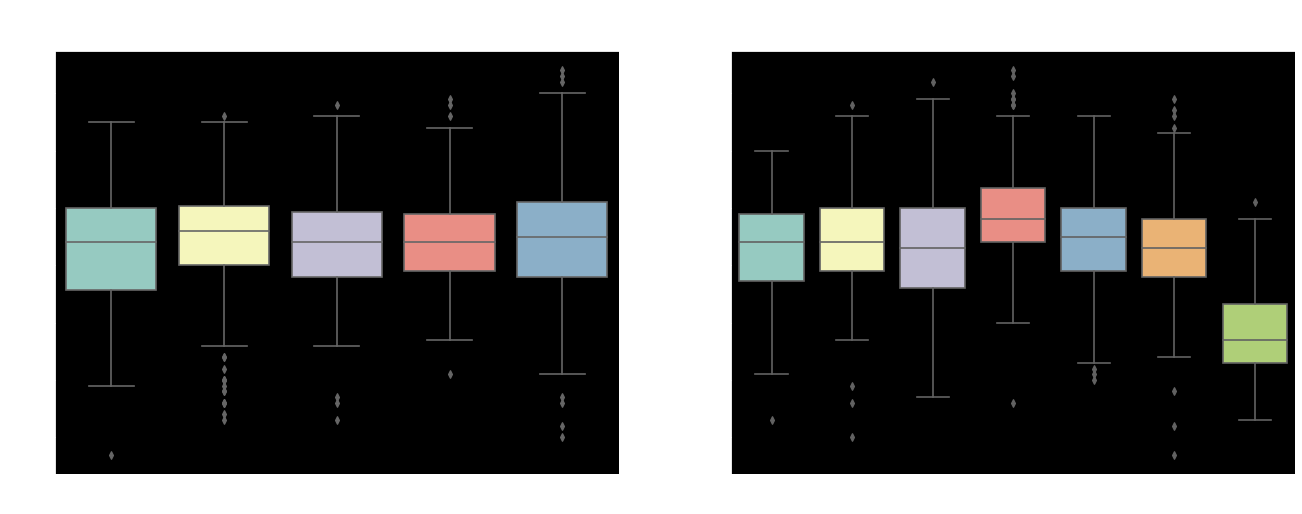

In [208]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='weekday', y='acceleration', data=df_hour, ax=axes[0])
sns.boxplot(x='month', y='acceleration', data=df_hour.loc[~df_hour.yearweek.isin([1, 52]), :])

# Set Title
axes[0].set_title('weekday Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

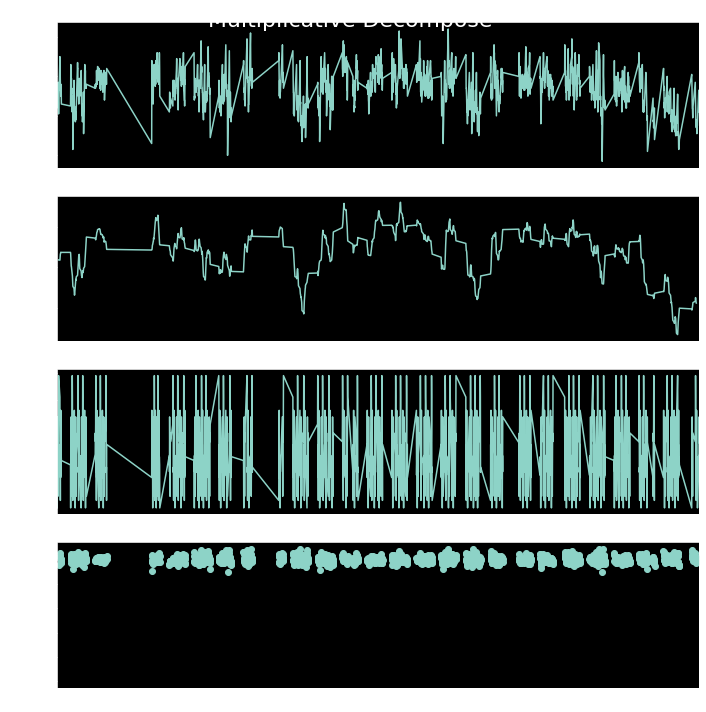

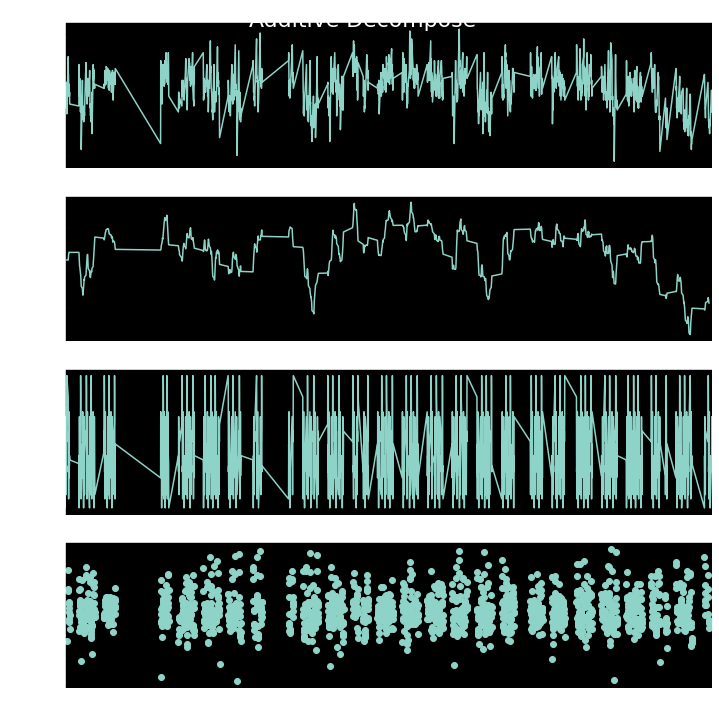

In [209]:
#Lets do some seasonality calculation adn division, we can start with additive time series
# Value = Base Level + Trend + Seasonality + Error

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_hour['acceleration'], model='multiplicative', period=24)

# Additive Decomposition
result_add = seasonal_decompose(df_hour['acceleration'], model='additive', period=24)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [210]:
result = adfuller(df_hour.acceleration.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_hour.acceleration.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.906213013473225
p-value: 3.391613007292317e-05
Critial Values:
   1%, -3.4343880265995215
Critial Values:
   5%, -2.8633235546096194
Critial Values:
   10%, -2.56771952639493

KPSS Statistic: 0.607350
p-value: 0.021968
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


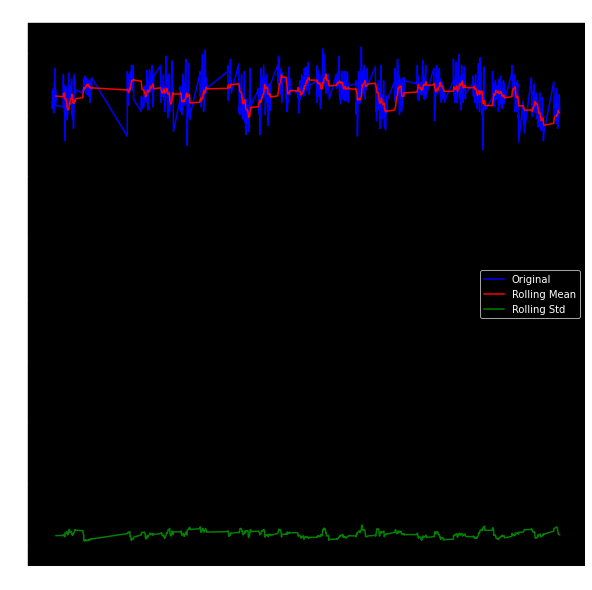

Results of Dickey-Fuller Test:


Test Statistic                   -4.906213
p-value                           0.000034
#Lags Used                       15.000000
Number of Observations Used    1622.000000
Critical Value (1%)              -3.434388
Critical Value (5%)              -2.863324
Critical Value (10%)             -2.567720
dtype: float64

In [211]:
#Determing rolling statistics to check for stationarity
rolmean = df_hour['acceleration'].rolling(24).mean()
rolstd = df_hour['acceleration'].rolling(24).std()
#Plot rolling statistics:
plt.plot(df_hour['acceleration'], color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='green', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_hour['acceleration'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

In [212]:
smooth_df_hour=df_hour['acceleration']-rolmean
smooth_df_hour.dropna(inplace=True)
smooth_df_hour


Time
2021-12-10 16:00:00   -0.302083
2021-12-13 06:00:00   -0.331250
2021-12-13 07:00:00    0.002083
2021-12-13 08:00:00    0.666667
2021-12-13 09:00:00    0.335417
                         ...   
2022-06-08 21:00:00   -0.231250
2022-06-09 06:00:00    0.579167
2022-06-09 07:00:00    0.333333
2022-06-09 08:00:00    0.141667
2022-06-09 09:00:00    0.045833
Name: acceleration, Length: 1615, dtype: float64

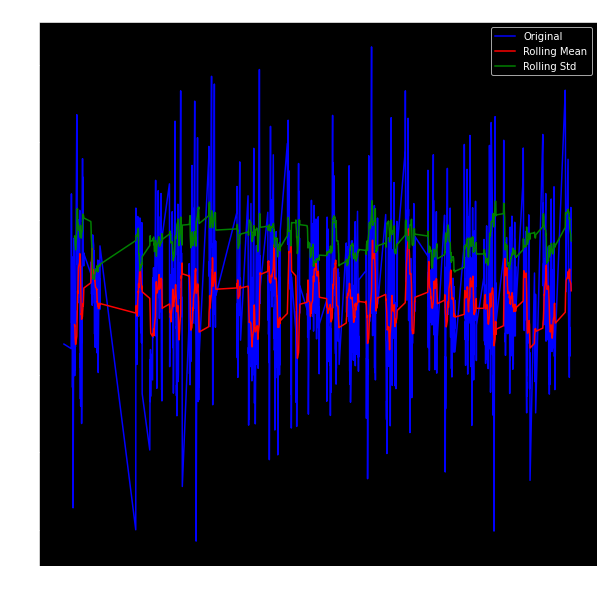

Results of Dickey-Fuller Test:


Test Statistic                -1.174391e+01
p-value                        1.254636e-21
#Lags Used                     2.000000e+01
Number of Observations Used    1.594000e+03
Critical Value (1%)           -3.434459e+00
Critical Value (5%)           -2.863355e+00
Critical Value (10%)          -2.567736e+00
dtype: float64

In [213]:
#Determing rolling statistics to check for stationarity
rolmean = smooth_df_hour.rolling(24).mean()
rolstd = smooth_df_hour.rolling(24).std()
#Plot rolling statistics:
plt.plot(smooth_df_hour, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='green', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(smooth_df_hour, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Text(0.5, 0.98, 'Decomposition')

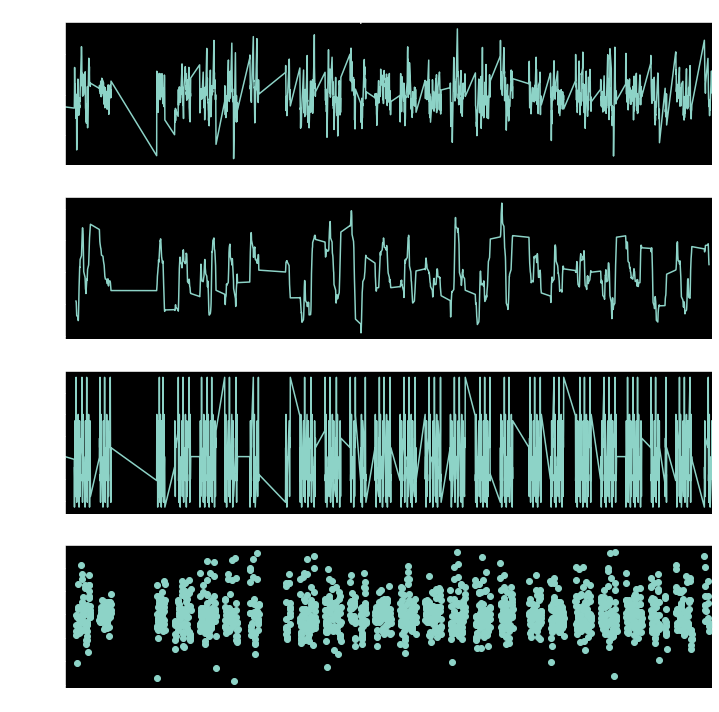

In [214]:
decomposition = seasonal_decompose(smooth_df_hour, period=24)
hour_trend = decomposition.trend
hour_seasonal = decomposition.seasonal
hour_residual = decomposition.resid
decomposition.plot().suptitle("Decomposition")

In [215]:
#Left it here for hour analysis:
""" 
It feels like there is too much noise in the data. It feels not very wise to just remove all the 0 values to this dataset. 
But it will be very difficult to extract trends from graphs that have so much noise.
Potentially an idea is to instead of filtering out all 0s which will make the period not constant. We could filter out the "predetermined" working hours
lets just explore quickly a bit about that

"""

' \nIt feels like there is too much noise in the data. It feels not very wise to just remove all the 0 values to this dataset. \nBut it will be very difficult to extract trends from graphs that have so much noise.\nPotentially an idea is to instead of filtering out all 0s which will make the period not constant. We could filter out the "predetermined" working hours\nlets just explore quickly a bit about that\n\n'

In [216]:
#Remove Night hours and weekends
df_hour_filtered = df.resample('H').median()
df_hour_filtered['weekday'] = [d.strftime('%a') for d in df_hour_filtered.index]
df_hour_filtered['hour'] = [d.strftime('%H') for d in df_hour_filtered.index]
df_hour_filtered['yearweek'] = [d.strftime('%W') for d in df_hour_filtered.index]
df_hour_filtered['month'] = [d.strftime('%b') for d in df_hour_filtered.index]
df_hour_filtered['yearday'] = [d.strftime('%j') for d in df_hour_filtered.index]
df_hour_filtered['year'] = [d.strftime('%Y') for d in df_hour_filtered.index]
df_hour_filtered['hour']=df_hour_filtered['hour'].astype(int)
df_hour_filtered = df_hour_filtered[~df_hour_filtered['weekday'].isin(['Sat', 'Sun'])]
df_hour_filtered = df_hour_filtered[~df_hour_filtered['hour'].isin([21,22,23,0,1,2,3,4,5,6])]
#We can also check what other days have deviations
outlier_day_df = df_hour_filtered.loc[df_hour_filtered['acceleration']<12]
outlier_days = outlier_day_df['yearday'].unique()
outlier_days

array(['344', '351', '357', '358', '361', '362', '363', '364', '365',
       '003', '004', '007', '010', '014', '026', '028', '031', '032',
       '033', '034', '035', '038', '039', '040', '041', '042', '049',
       '054', '056', '059', '060', '061', '063', '066', '070', '077',
       '080', '081', '084', '091', '098', '104', '105', '108', '112',
       '119', '126', '131', '133', '140', '145', '146', '147', '154',
       '157', '158'], dtype=object)

In [217]:
df_hour_filtered

,acceleration,weekday,hour,yearweek,month,yearday,year
Time,,,,,,,
2021-12-09 09:00:00,14.75,Thu,9,49,Dec,343,2021
2021-12-09 10:00:00,14.20,Thu,10,49,Dec,343,2021
2021-12-09 11:00:00,14.45,Thu,11,49,Dec,343,2021
2021-12-09 12:00:00,14.25,Thu,12,49,Dec,343,2021
2021-12-09 13:00:00,14.45,Thu,13,49,Dec,343,2021
...,...,...,...,...,...,...,...
2022-06-08 19:00:00,13.90,Wed,19,23,Jun,159,2022
2022-06-08 20:00:00,13.75,Wed,20,23,Jun,159,2022
2022-06-09 07:00:00,14.40,Thu,7,23,Jun,160,2022


In [218]:
# We could remove these days completely to have a clean dataset with a correct periodicity
df_hour_filtered = df_hour_filtered[~df_hour_filtered['yearday'].isin(outlier_days)]
rolmean_df_hour_filtered = df_hour_filtered['acceleration'].rolling(50).mean()
rolstd_df_hour_filtered = df_hour_filtered['acceleration'].rolling(50).std()
higher_bound = rolmean_df_hour_filtered + 3 *rolstd_df_hour_filtered 
lower_bound = rolmean_df_hour_filtered - 3 *rolstd_df_hour_filtered 


In [235]:
#In this section // test part we remove the datetime index and just add a serial
df_test=df_hour_filtered.copy()
df_test.reset_index(inplace=True)
df_test

,Time,acceleration,weekday,hour,yearweek,month,yearday,year
0,2021-12-09 09:00:00,14.75,Thu,9,49,Dec,343,2021
1,2021-12-09 10:00:00,14.20,Thu,10,49,Dec,343,2021
2,2021-12-09 11:00:00,14.45,Thu,11,49,Dec,343,2021
3,2021-12-09 12:00:00,14.25,Thu,12,49,Dec,343,2021
4,2021-12-09 13:00:00,14.45,Thu,13,49,Dec,343,2021
...,...,...,...,...,...,...,...,...
1032,2022-06-08 19:00:00,13.90,Wed,19,23,Jun,159,2022
1033,2022-06-08 20:00:00,13.75,Wed,20,23,Jun,159,2022
1034,2022-06-09 07:00:00,14.40,Thu,7,23,Jun,160,2022
1035,2022-06-09 08:00:00,14.20,Thu,8,23,Jun,160,2022


In [237]:
rolmean_df_test = df_test['acceleration'].rolling(50).mean()
rolstd_df_test = df_test['acceleration'].rolling(50).std()
higher_bound = rolmean_df_test + 3 *rolstd_df_test 
lower_bound = rolmean_df_test - 3 *rolstd_df_test 

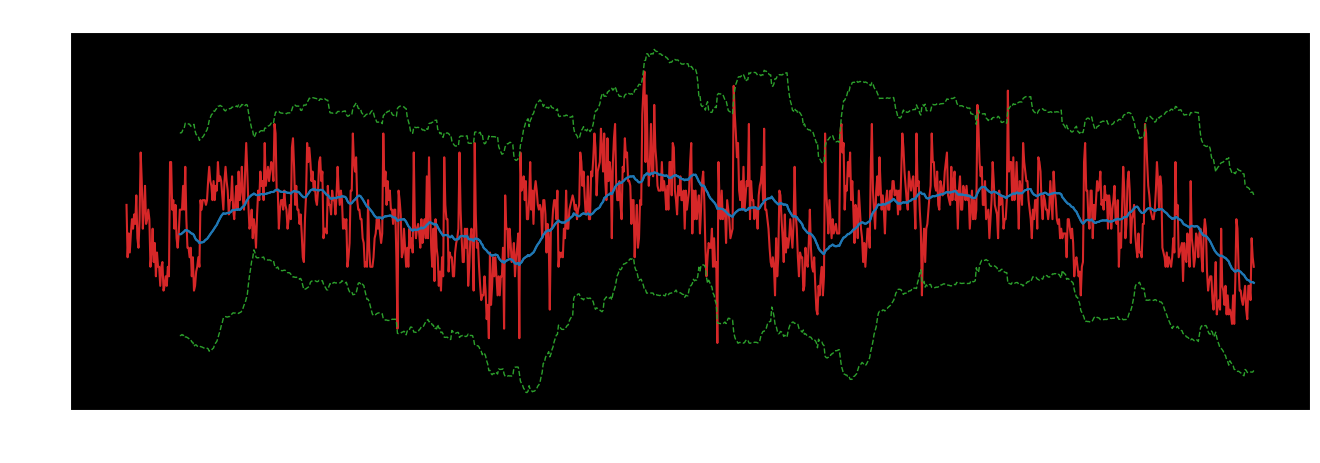

In [238]:
#plot them with boundries on top of 3 standard deviations
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df_test.index, df_test['acceleration'], color='tab:red')
plt.plot(df_test.index, rolmean_df_test, color='tab:blue')
plt.plot(df_test.index, rolmean_df_test, color='tab:blue')
plt.plot(df_test.index, higher_bound, color='tab:green', ls='--', linewidth = 1)
plt.plot(df_test.index, lower_bound, color='tab:green', ls='--', linewidth = 1)
plt.plot
plt.gca().set(title='acceleration with 3 std boundries', xlabel='date', ylabel='m/s2')
plt.show()

In [244]:
#Do the same but just setting the index
df_string= df_hour_filtered.copy()
df_string.index = df_string.index.strftime('%m/%d/%Y, %H')
df_string.index

Index(['12/09/2021, 09', '12/09/2021, 10', '12/09/2021, 11', '12/09/2021, 12',
       '12/09/2021, 13', '12/09/2021, 14', '12/09/2021, 15', '12/09/2021, 16',
       '12/09/2021, 17', '12/09/2021, 18',
       ...
       '06/08/2022, 14', '06/08/2022, 15', '06/08/2022, 16', '06/08/2022, 17',
       '06/08/2022, 18', '06/08/2022, 19', '06/08/2022, 20', '06/09/2022, 07',
       '06/09/2022, 08', '06/09/2022, 09'],
      dtype='object', name='Time', length=1037)

In [245]:
rolmean_df_string = df_string['acceleration'].rolling(50).mean()
rolstd_df_string = df_string['acceleration'].rolling(50).std()
higher_bound = rolmean_df_string + 3 *rolstd_df_string 
lower_bound = rolmean_df_string - 3 *rolstd_df_string 

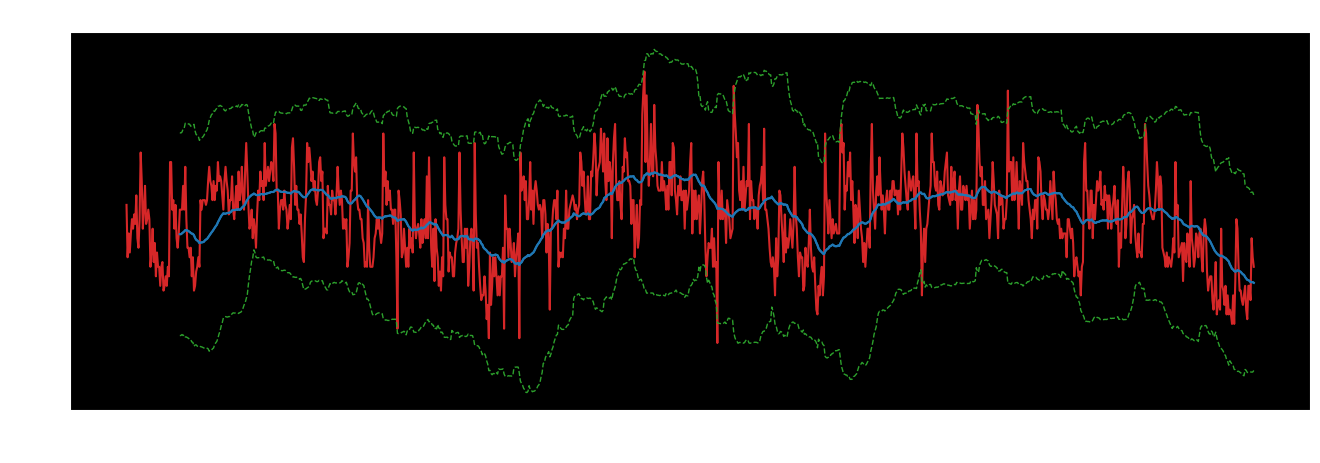

In [246]:
#plot them with boundries on top of 3 standard deviations
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df_string.index, df_string['acceleration'], color='tab:red')
plt.plot(df_string.index, rolmean_df_string, color='tab:blue')
plt.plot(df_string.index, rolmean_df_string, color='tab:blue')
plt.plot(df_string.index, higher_bound, color='tab:green', ls='--', linewidth = 1)
plt.plot(df_string.index, lower_bound, color='tab:green', ls='--', linewidth = 1)
plt.plot
plt.gca().set(title='acceleration with 3 std boundries', xlabel='date', ylabel='m/s2')
plt.show()

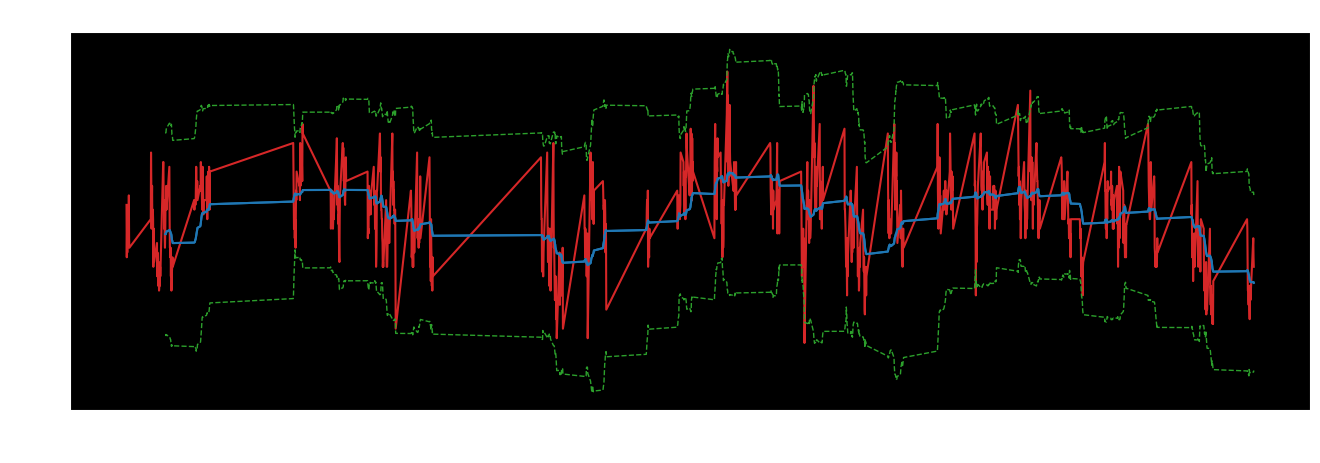

In [221]:
#plot them with boundries on top of 3 standard deviations
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df_hour_filtered.index, df_hour_filtered['acceleration'], color='tab:red')
plt.plot(df_hour_filtered.index, rolmean_df_hour_filtered, color='tab:blue')
plt.plot(df_hour_filtered.index, rolmean_df_hour_filtered, color='tab:blue')
plt.plot(df_hour_filtered.index, higher_bound, color='tab:green', ls='--', linewidth = 1)
plt.plot(df_hour_filtered.index, lower_bound, color='tab:green', ls='--', linewidth = 1)
plt.plot
plt.gca().set(title='acceleration with 3 std boundries', xlabel='date', ylabel='m/s2')
plt.show()

In [ ]:
#Try using the trend af my series
df_acceleration=result_mul.trend
df_acceleration

Time
2021-12-09 09:00:00    14.822723
2021-12-09 10:00:00    14.813068
2021-12-09 11:00:00    14.803413
2021-12-09 12:00:00    14.793759
2021-12-09 13:00:00    14.784104
                         ...    
2022-06-08 21:00:00    14.212742
2022-06-09 06:00:00    14.223145
2022-06-09 07:00:00    14.233548
2022-06-09 08:00:00    14.243952
2022-06-09 09:00:00    14.254355
Name: trend, Length: 1638, dtype: float64

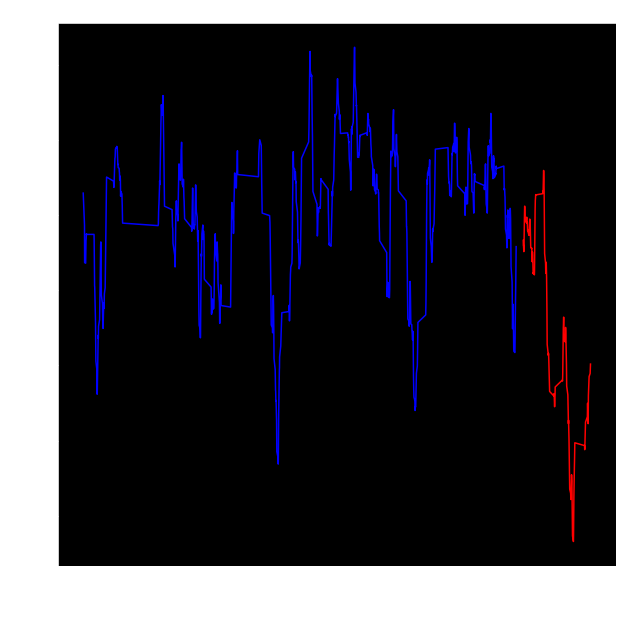

In [ ]:
train = df_acceleration[df_acceleration.index < pd.to_datetime("2022-05-15", format='%Y-%m-%d')]
test = df_acceleration[df_acceleration.index >= pd.to_datetime("2022-05-15", format='%Y-%m-%d')]

plt.plot(train ,color = "blue")
plt.plot(test, color = "red")
plt.ylabel('df_acceleration Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for df_acceleration Data")
plt.show()

In [ ]:
train

Time
2021-12-09 09:00:00    14.822723
2021-12-09 10:00:00    14.813068
2021-12-09 11:00:00    14.803413
2021-12-09 12:00:00    14.793759
2021-12-09 13:00:00    14.784104
                         ...    
2022-05-13 13:00:00    14.507292
2022-05-13 14:00:00    14.547917
2022-05-13 15:00:00    14.577083
2022-05-13 16:00:00    14.595833
2022-05-13 17:00:00    14.644792
Name: trend, Length: 1391, dtype: float64

In [222]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# y=df_hour['acceleration']
y=train
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

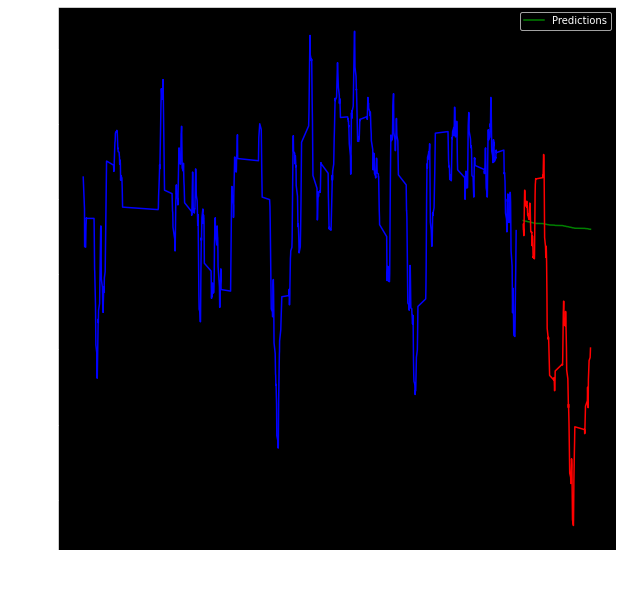

In [223]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.plot(train ,color = "blue")
plt.plot(test, color = "red")
plt.ylabel('df_acceleration Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE:  0.4297736069200509


c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


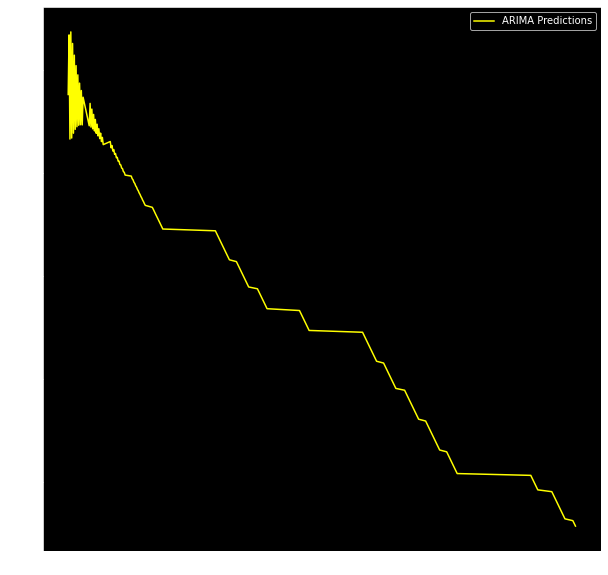

In [ ]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to conv

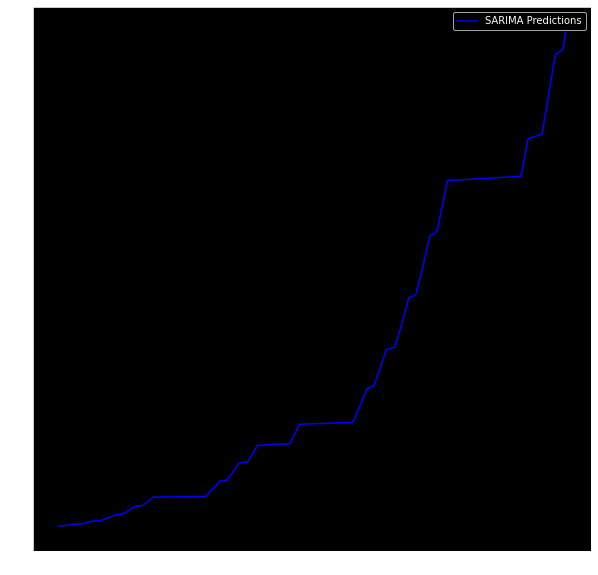

In [ ]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

The idea is the following: lets use daily values to spot trends. Lets take means or median of day values. And the days that have 0 lets give them the same value as the previous day. And try to predict from there

In [ ]:
# Do test but with day values
#lets try filtering out cero values in advance
df_filtered=df[df['acceleration']>10]
df_day = df_filtered.resample('d').mean()
df_day['weekday'] = [d.strftime('%a') for d in df_day.index]
df_day['day'] = [d.strftime('%H') for d in df_day.index]
df_day['yearweek'] = [d.strftime('%W') for d in df_day.index]
df_day['month'] = [d.strftime('%b') for d in df_day.index]
df_day['yearday'] = [d.strftime('%j') for d in df_day.index]
df_day['year'] = [d.strftime('%Y') for d in df_day.index]
df_day['day']=df_day['day'].astype(int)

In [ ]:
df_day['acceleration'].isnull().values.sum()

71

In [ ]:
#Explore weekends
weekends_perday = df_day[df_day['weekday'].isin(['Sat' , 'Sun'])]
weekends_perday

,acceleration,weekday,day,yearweek,month,yearday,year
Time,,,,,,,
2021-12-11,NaN,Sat,0,49,Dec,345,2021
2021-12-12,NaN,Sun,0,49,Dec,346,2021
2021-12-18,NaN,Sat,0,50,Dec,352,2021
2021-12-19,NaN,Sun,0,50,Dec,353,2021
2021-12-25,NaN,Sat,0,51,Dec,359,2021
2021-12-26,NaN,Sun,0,51,Dec,360,2021
2022-01-01,NaN,Sat,0,00,Jan,001,2022
2022-01-02,NaN,Sun,0,00,Jan,002,2022
2022-01-08,NaN,Sat,0,01,Jan,008,2022


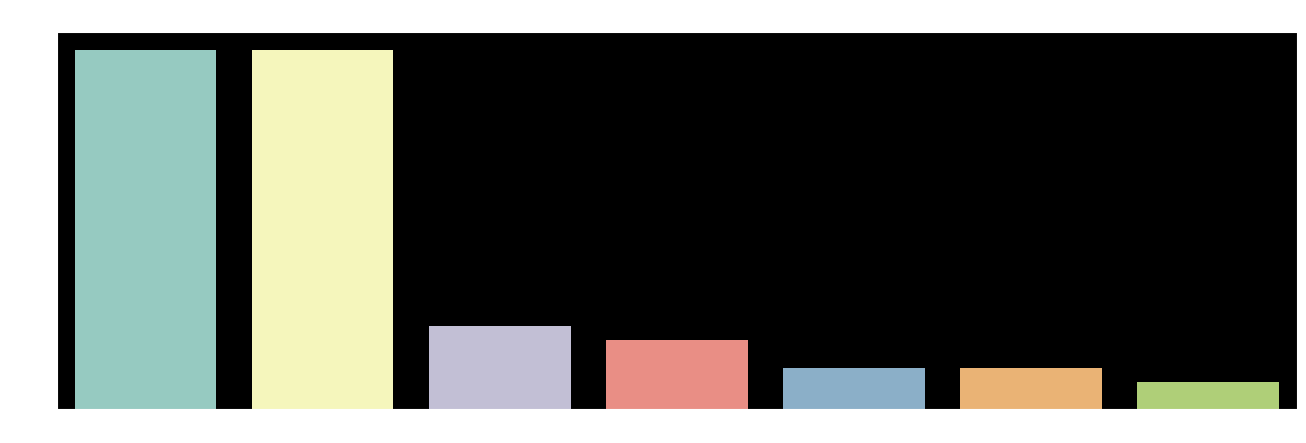

In [ ]:
# Lets Check the emtpy values
empty_list = df_day[df_day['acceleration'].isnull()]
y = empty_list['weekday'].value_counts()
x = empty_list['weekday'].unique()
plt.figure(figsize=(16,5), dpi=100)
sns.barplot(x=x, y=y)
plt.title('Days with 0 values in acceleration')
plt.show()


In [ ]:
df_day['acceleration']

Time
2021-12-09    14.614485
2021-12-10    14.880271
2021-12-11          NaN
2021-12-12          NaN
2021-12-13    14.618548
                ...    
2022-06-05          NaN
2022-06-06          NaN
2022-06-07    14.468827
2022-06-08    14.100000
2022-06-09    14.437168
Freq: D, Name: acceleration, Length: 183, dtype: float64

In [ ]:
df_day_filtered=df_day[df_day['acceleration']>8]

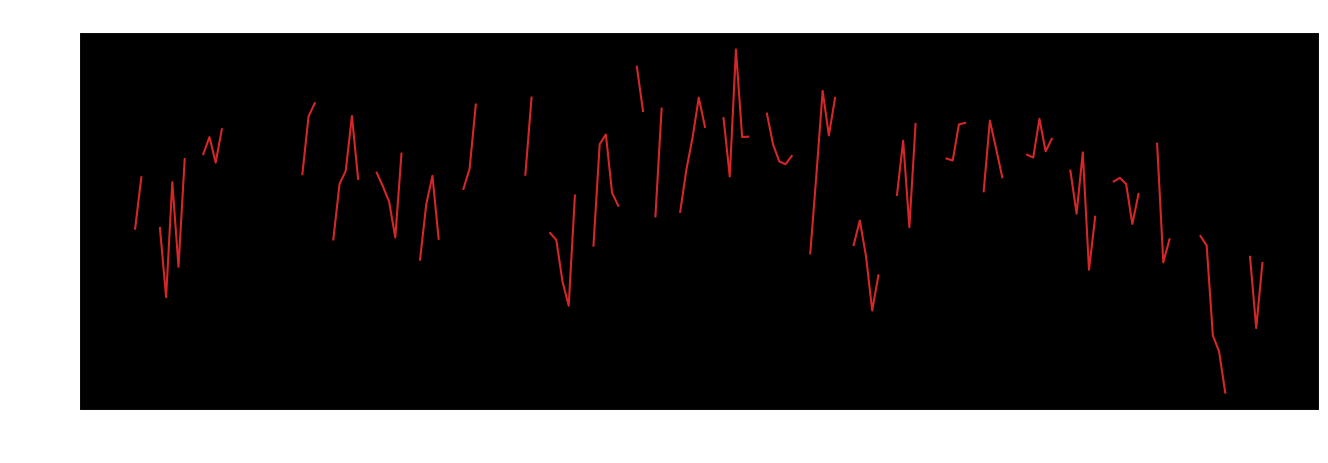

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df_day.index, df_day['acceleration'], color='tab:red')
# plt.axhline(y=[18], color='green', ls='--', lw=2, label='vline_multiple - full height')
plt.gca().set(title='acceleration', xlabel='date', ylabel='m/s2')
plt.show()

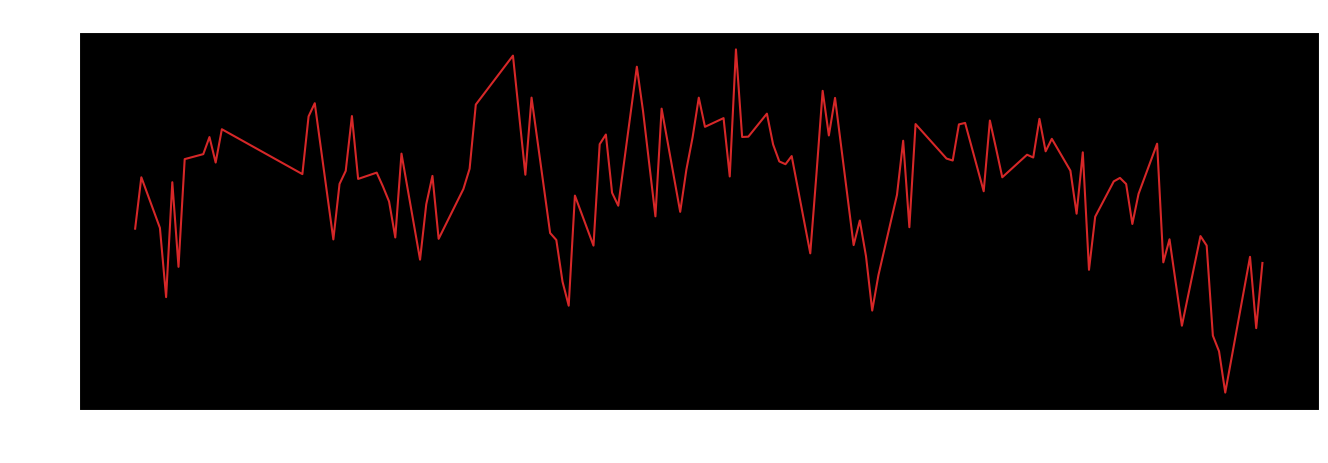

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df_day_filtered.index, df_day_filtered['acceleration'], color='tab:red')
# plt.axhline(y=[18], color='green', ls='--', lw=2, label='vline_multiple - full height')
plt.gca().set(title='acceleration', xlabel='date', ylabel='m/s2')
plt.show()

In [ ]:
#Lets do some seasonality calculation adn division, we can start with additive time series
# Value = Base Level + Trend + Seasonality + Error

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_day['acceleration'], model='multiplicative', extrapolate_trend='freq', period=7)

# Additive Decomposition
result_add = seasonal_decompose(df_day['acceleration'], model='additive', extrapolate_trend='freq', period=7)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

ValueError: This function does not handle missing values